In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

чтение данных

In [10]:
data = pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

разделение данных на тестовый и обучающий набор 

In [11]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

зависимость качества модели от глубины используемых деревьев

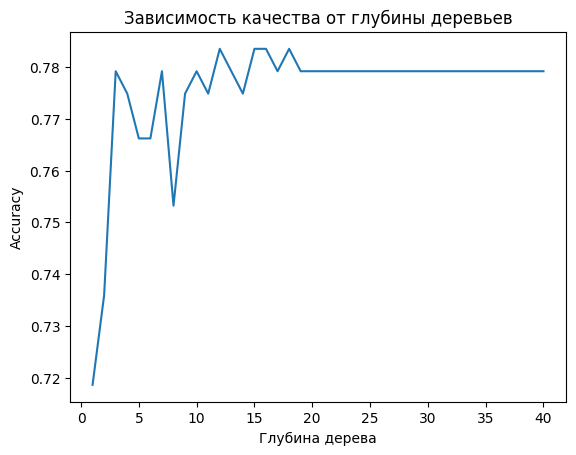

In [12]:
depths = range(1, 41)
accuracies = []

for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(depths, accuracies)
plt.title("Зависимость качества от глубины деревьев")
plt.xlabel("Глубина дерева")
plt.ylabel("Accuracy")
plt.show()

зависимость качества моделей от колличества признаков

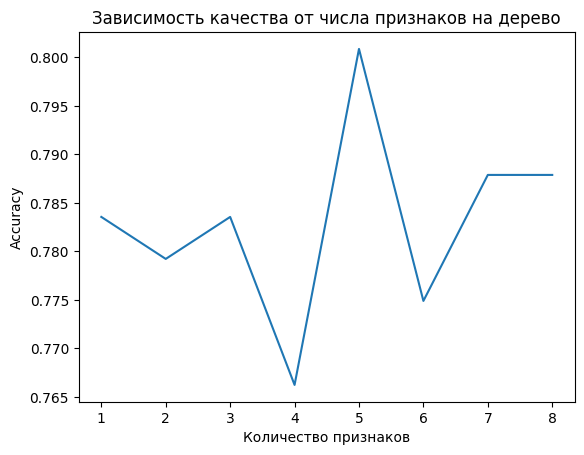

In [13]:
feature_count = X.shape[1]
features = range(1, feature_count + 1)
accuracies = []

for f in features:
    clf = RandomForestClassifier(max_features=f, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(features, accuracies)
plt.title("Зависимость качества от числа признаков на дерево")
plt.xlabel("Количество признаков")
plt.ylabel("Accuracy")
plt.show()

зависимость качества от числа деревьев

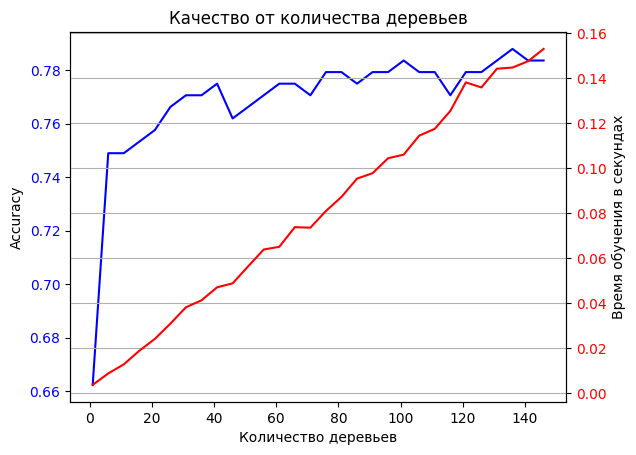

In [14]:
import time

trees = range(1, 150,5)
accuracies = []
times = []

for n in trees:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    end = time.time()
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    times.append(end - start)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('Accuracy')
ax1.plot(trees, accuracies,  color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Время обучения в секундах')
ax2.plot(trees, times, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Качество от количества деревьев")
plt.grid(True)
plt.show()

In [15]:
%pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/47/78/27daa8e0287ce205908f089564472af42eb4646146a51d2fbb76ef8f3880/xgboost-3.0.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.0.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 871.5 kB/s eta 0:02:52
   ---------------------------------------- 0.2/150.0 MB 1.2 MB/s eta 0:02:01
   ---------------------------------------- 0.4/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 0.7/150.0 MB 2.9 MB/s eta 0:00:51
   ---------------------------------------- 0.7/150.0 MB 2.9 MB/s eta 0:00:51
   ---------------------------------------- 1.1/150.0 MB 3.2 MB/s eta 0:00:48
   ------------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=3, objective='binary:logistic', reg_alpha=30, reg_lambda=80, booster='dart')
start = time.time()
bst.fit(X_train, y_train)
end = time.time()

y_pred = bst.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность: {acc}")
print(f"Время обучения: {end - start} секунд")

Точность: 0.7359307359307359
Время обучения: 0.2059004306793213 секунд


При исследовании с использованием xgboost, с учетом набора гиперпараметров, была получена хорошая точность за короткий промежуток времени, по сравнению с методом случайного леса. 
Метод же случайного леса показывает увеличение точности модели с ростом глубины и количества деревьев, но одновременно с этим растет и время обучения